## **Product Complaint Classification Analysis**

## **Problem  Statement:**

The problem involves classifying consumer complaints related to financial products into specific categories. The dataset contains complaints on various financial products, such as credit reporting, loans, credit cards, and more. The objective is to develop a classification model that can accurately categorize these complaints, enabling banking and financial institutions to efficiently address customer issues and provide tailored solutions based on the type of complaint.

## **Objective:**

The main objective of this project is to build a text classification model that can categorize consumer complaints into predefined categories of financial products. By achieving this objective, the following benefits can be realized:

**Efficient Customer Service:** The model can automate the initial sorting and classification of customer complaints, allowing customer service teams to address issues more quickly and efficiently.

**Customized Solutions:** With complaints accurately categorized, banking and financial institutions can offer tailored solutions for each category, enhancing customer satisfaction.

**Data-Driven Insights:** By analyzing patterns in categorized complaints, institutions can gain valuable insights into the most common issues faced by customers, leading to improvements in their products and services

## **Dataset:**

The dataset consists of consumer complaints on various financial products and services. It includes textual descriptions of complaints along with their corresponding categories. The categories are as follows:

* 'Credit reporting, credit repair services, or other personal consumer reports'
* 'Payday loan, title loan, or personal loan'
* 'Checking or savings account'
* 'Credit card or prepaid card'
* 'Money transfer, virtual currency, or money service'
* 'Mortgage'
* 'Vehicle loan or lease'
* 'Debt collection'
* 'Student loan'
* 'Bank account or service'
* 'Consumer Loan'
* 'Other financial service'
* 'Credit card'
* 'Prepaid card'
* 'Payday loan'
* 'Money transfers'
* 'Virtual currency'

## **Exploratory Data Analysis (EDA) Approach:**
## **Data Quality Check, Statistical Analysis, and Visualization**

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from textblob import TextBlob
from nltk.stem import PorterStemmer,SnowballStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer

from io import StringIO
import os
import string
import gensim
from gensim.models import Word2Vec
import itertools
import scipy
from scipy import spatial
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
stopword_list = nltk.corpus.stopwords.words('english')
tokenizer = ToktokTokenizer()
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#  Data Quality Check (DQC):



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load the dataset
df = pd.read_csv("/content/drive/MyDrive/company_data/complaints.csv")
df.head(10)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-07-26,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33311,NaN,NaN,Web,2023-07-26,In progress,Yes,NaN,7304973
1,2023-07-26,"Payday loan, title loan, or personal loan",Title loan,Charged fees or interest you didn't expect,NaN,NaN,NaN,DFC Global Corp.,CA,92517,NaN,NaN,Web,2023-07-26,In progress,Yes,NaN,7299736
2,2023-07-25,Checking or savings account,Checking account,Managing an account,Banking errors,NaN,NaN,NAVY FEDERAL CREDIT UNION,CA,90008,NaN,NaN,Phone,2023-07-25,In progress,Yes,NaN,7300424
3,2023-07-25,Checking or savings account,Checking account,Problem with a lender or other company chargin...,Transaction was not authorized,NaN,NaN,NAVY FEDERAL CREDIT UNION,PA,19120,NaN,NaN,Referral,2023-07-25,In progress,Yes,NaN,7302242
4,2023-07-25,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,NaN,NaN,NAVY FEDERAL CREDIT UNION,WA,98520,NaN,NaN,Web,2023-07-25,In progress,Yes,NaN,7301655
5,2023-05-31,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,I looked over my credit report and saw some in...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,VA,22405,NaN,Consent provided,Web,2023-05-31,Closed with explanation,Yes,NaN,7045386
6,2023-07-29,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AR,723XX,NaN,NaN,Web,2023-07-29,In progress,Yes,NaN,7321908
7,2023-07-29,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",MO,64804,Servicemember,NaN,Web,2023-07-29,In progress,Yes,NaN,7321956
8,2023-07-29,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,92592,NaN,NaN,Web,2023-07-29,In progress,Yes,NaN,7321957
9,2023-07-29,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",ND,58701,NaN,NaN,Web,2023-07-29,In progress,Yes,NaN,7322027


In [ ]:
#check for dimensions
df.shape

(3898716, 18)

In [ ]:
#check for columns
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [ ]:
#check datatypes
df.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [ ]:
# List of columns to check unique values
columns_of_interest = df.columns

# Get unique values for selected columns
for column in columns_of_interest:
    unique_values = df[column].nunique()
    print(f"Column: {column}\nUnique Values: {unique_values}\n")


Column: Date received
Unique Values: 4259

Column: Product
Unique Values: 18

Column: Sub-product
Unique Values: 76

Column: Issue
Unique Values: 165

Column: Sub-issue
Unique Values: 221

Column: Consumer complaint narrative
Unique Values: 1206569

Column: Company public response
Unique Values: 11

Column: Company
Unique Values: 6836

Column: State
Unique Values: 63

Column: ZIP code
Unique Values: 33001

Column: Tags
Unique Values: 3

Column: Consumer consent provided?
Unique Values: 4

Column: Submitted via
Unique Values: 7

Column: Date sent to company
Unique Values: 4208

Column: Company response to consumer
Unique Values: 8

Column: Timely response?
Unique Values: 2

Column: Consumer disputed?
Unique Values: 2

Column: Complaint ID
Unique Values: 3898716



In [ ]:
# List of columns you want to check unique values for
columns_of_interest = ['Product', 'Sub-product', 'State', 'Tags',
                       'Consumer consent provided?', 'Submitted via', 'Company response to consumer',
                       'Timely response?', 'Consumer disputed?']

# Unique values for selected columns
for column in columns_of_interest:
    unique_values = df[column].unique()
    print(f"Column: {column}\nUnique Values: {unique_values}\n")


Column: Product
Unique Values: ['Credit reporting, credit repair services, or other personal consumer reports'
 'Payday loan, title loan, or personal loan' 'Checking or savings account'
 'Credit card or prepaid card'
 'Money transfer, virtual currency, or money service' 'Mortgage'
 'Vehicle loan or lease' 'Debt collection' 'Student loan'
 'Bank account or service' 'Consumer Loan' 'Credit reporting'
 'Other financial service' 'Credit card' 'Prepaid card' 'Payday loan'
 'Money transfers' 'Virtual currency']

Column: Sub-product
Unique Values: ['Credit reporting' 'Title loan' 'Checking account'
 'General-purpose credit card or charge card'
 'International money transfer' 'FHA mortgage' 'Loan' 'Medical debt'
 'Lease' 'Federal student loan servicing' 'VA mortgage' 'Gift card'
 'I do not know' 'Credit card debt' 'Other debt' 'Store credit card'
 'Other personal consumer report' 'General-purpose prepaid card'
 'Auto debt' 'Domestic (US) money transfer' 'Payday loan debt'
 'Installment loan' '

## 2. Statistical Analysis:


In [ ]:
# summary of key statistical measures for numerical columns in a dataset, aiding in quick data assessment and initial insights
df.describe(include='all')

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
count,3898716,3898716,3663425,3898716,3182473,1412456,1790335,3898716,3856420,3868520,414097,3012523,3898716,3898716,3898711,3898716,768358,3.898716e+06
unique,4259,18,76,165,221,1206569,11,6836,63,33001,3,4,7,4208,8,2,2,NaN
top,2023-06-27,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,My credit reports are inaccurate. These inaccu...,Company has responded to the consumer and the ...,"EQUIFAX, INC.",CA,XXXXX,Servicemember,Consent not provided,Web,2023-06-27,Closed with explanation,Yes,No,NaN
freq,4725,2074862,2054397,999447,651647,1777,1565443,732980,457705,97310,238653,1458303,3377377,4830,2866820,3845342,619980,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.190214e+06
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.964971e+06
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.816436e+06
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.089040e+06
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.958127e+06


 Here are insights that can be extracted from the provided summary statistics:

1. **Data Volume and Completeness:**
   - The dataset contains a total of 3,898,716 records.
   - Some columns have missing data: "Sub-product," "Sub-issue," "Consumer complaint narrative," and others have fewer counts compared to the total records.

2. **Unique Values and Variability:**
   - The "Product" column has 18 unique values, indicating 18 different financial products.
   - The most common product is "Credit reporting, credit repair services, or other personal consumer reports" with 2,074,862 occurrences.
   - The "Issue" column has 165 unique issues raised by consumers.

3. **Top Occurrences:**
   - The most common "Date received" is "2023-06-27," suggesting a significant number of complaints on that day.
   - "Credit reporting" is the most common "Sub-product," occurring 2,054,397 times.
   - The most frequent "Issue" is "Incorrect information on your report," occurring 999,447 times.
   - "EQUIFAX, INC." is the most frequent company mentioned in the complaints.

4. **Location and State:**
   - The dataset covers complaints from 63 unique states.
   - Most frequent state: "CA" (California) with 457,705 occurrences.

5. **Tags and Consent:**
   - "Servicemember" is the most common tag associated with complaints.
   - "Consent not provided" is the most common consumer consent status.

6. **Temporal Analysis:**
   - The "Date sent to company" column seems to have a wide range of values, indicating complaints sent to companies on various dates.
   - The presence of "2023-06-27" as the most common date could indicate an anomaly or pattern in complaint submissions.

7. **Response and Disputes:**
   - Most complaints are marked as "Closed with explanation" for the "Company response to consumer."
   - The majority of complaints received a timely response ("Timely response?": "Yes").
   - Most consumers did not dispute their complaints ("Consumer disputed?": "No").

8. **Complaint ID and Data Integrity:**
   - The "Complaint ID" column starts from 1 and increments sequentially.
   - The presence of "NaN" in the "unique" row of some columns suggests missing data or categorical features.

9. **Statistical Measures:**
   - The "mean" and "std" rows contain "NaN," indicating that these statistics are not applicable to non-numeric columns.

These insights provide a preliminary understanding of the dataset's characteristics, including common issues, product distributions, geographical trends, and response patterns. Further analysis and visualizations can help delve deeper into specific aspects and relationships within the data.

In [ ]:
#calculate percentage of missing values
df.isnull().sum()/df.shape[0]*100

Date received                    0.000000
Product                          0.000000
Sub-product                      6.035090
Issue                            0.000000
Sub-issue                       18.371254
Consumer complaint narrative    63.771252
Company public response         54.078856
Company                          0.000000
State                            1.084870
ZIP code                         0.774511
Tags                            89.378631
Consumer consent provided?      22.730381
Submitted via                    0.000000
Date sent to company             0.000000
Company response to consumer     0.000128
Timely response?                 0.000000
Consumer disputed?              80.292024
Complaint ID                     0.000000
dtype: float64

 Here are insights that can be drawn from these percentages:

1. **Data Completeness:**
   - The columns "Date received," "Product," "Issue," "Company," "Submitted via," "Date sent to company," "Company response to consumer," "Timely response?" and "Complaint ID" have no missing values (0% missing).

2. **Missing Data in Text Columns:**
   - The "Consumer complaint narrative" column has a high percentage (63.77%) of missing values. This indicates that a significant portion of complaints does not have a detailed narrative.
   - The "Company public response" column also has a relatively high percentage (54.08%) of missing values.

3. **Categorical Columns with Missing Data:**
   - "Sub-product" has a 6.04% missing rate, indicating some instances where the sub-product associated with a product is missing.
   - "Sub-issue" has a higher missing rate of 18.37%, indicating that a substantial portion of complaints lacks sub-issue details.

4. **Geographical and Tag Information:**
   - "State" has a 1.08% missing rate, suggesting a relatively small number of complaints without a state specified.
   - "ZIP code" has a 0.77% missing rate, indicating a small portion of missing ZIP code information.
   - "Tags" has a very high missing rate of 89.38%, indicating that the majority of complaints do not have associated tags.

5. **Consumer Consent and Disputes:**
   - "Consumer consent provided?" has a 22.73% missing rate, indicating a substantial number of complaints without explicit consent status.
   - "Consumer disputed?" also has a high missing rate of 80.29%, suggesting that a large proportion of complaints do not have a dispute status.

These insights reveal the extent of missing data in various columns and can guide decisions on data preprocessing, analysis focus, and potential limitations of the analysis.

In [ ]:

complaints_df = pd.read_csv("/content/drive/MyDrive/company_data/complaints.csv")





In [ ]:
# Count of complaints by issue
issue_counts = complaints_df['Issue'].value_counts()
print(issue_counts.sum())

3898716


In [ ]:
# Count of complaints by sub-issue
sub_issue_counts = complaints_df['Sub-issue'].value_counts()
print(sub_issue_counts.sum())



3182473


In [ ]:
# Time Series Analysis
complaints_df['Date sent to company'] = pd.to_datetime(complaints_df['Date sent to company'])
complaints_df.sort_values('Date sent to company', inplace=True)

In [ ]:
# Group by date and count complaints received on each date
daily_complaints = complaints_df.groupby('Date sent to company').size()
print(daily_complaints)

Date sent to company
2011-12-01      61
2011-12-02      78
2011-12-04       5
2011-12-05     164
2011-12-06     152
              ... 
2023-07-27    2762
2023-07-28    2219
2023-07-29    1287
2023-07-30     514
2023-07-31      35
Length: 4208, dtype: int64


## `3. Visualization`

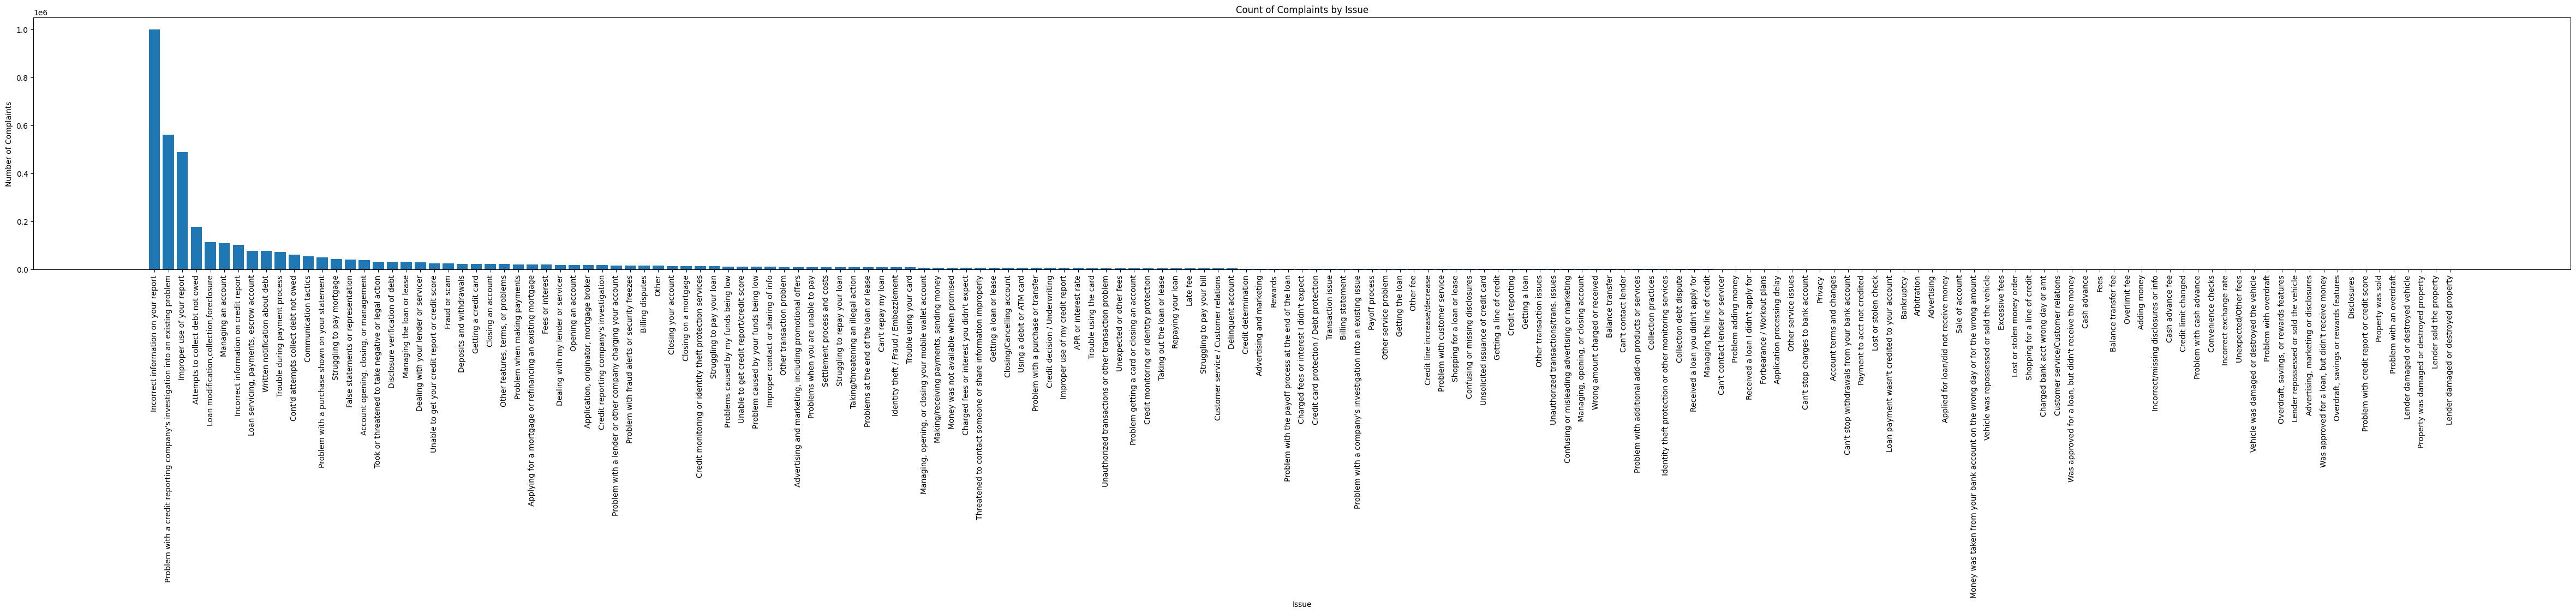

In [ ]:
# Visualization of issue counts
plt.figure(figsize=(60, 6))
plt.bar(issue_counts.index, issue_counts.values)
plt.xlabel('Issue')
plt.ylabel('Number of Complaints')
plt.title('Count of Complaints by Issue')
plt.xticks(rotation=90)
plt.show()


The tallest bars that are :

1.    Incorrect information on your report

2.   Problem with a credit reporting company's investigation into an existing problem

3. Improper use of your report

represent the issues with the highest complaint counts. These issues are the most frequent among consumer complaints.

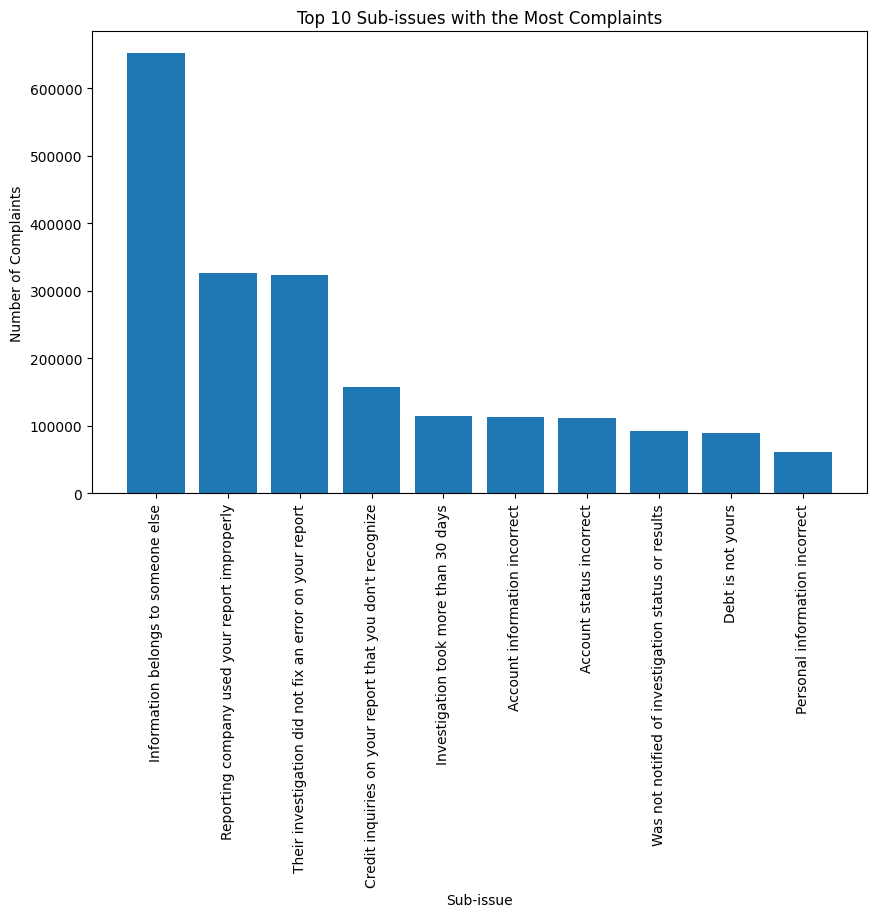

In [ ]:
# Visualization of top 10 sub-issues with the most complaints
plt.figure(figsize=(10, 6))
top_sub_issues = sub_issue_counts.head(10)
plt.bar(top_sub_issues.index, top_sub_issues.values)
plt.xlabel('Sub-issue')
plt.ylabel('Number of Complaints')
plt.title('Top 10 Sub-issues with the Most Complaints')
plt.xticks(rotation=90)
plt.show()

The tallest bars that are :

1.    Information belongs to someone else

2.   Their investigation did not fix an error on your report

3. Reporting company used your report improperly

 represents the sub-issues corresponding to issues with the highest complaint counts. These sub-issues are the most frequent among consumer complaints.





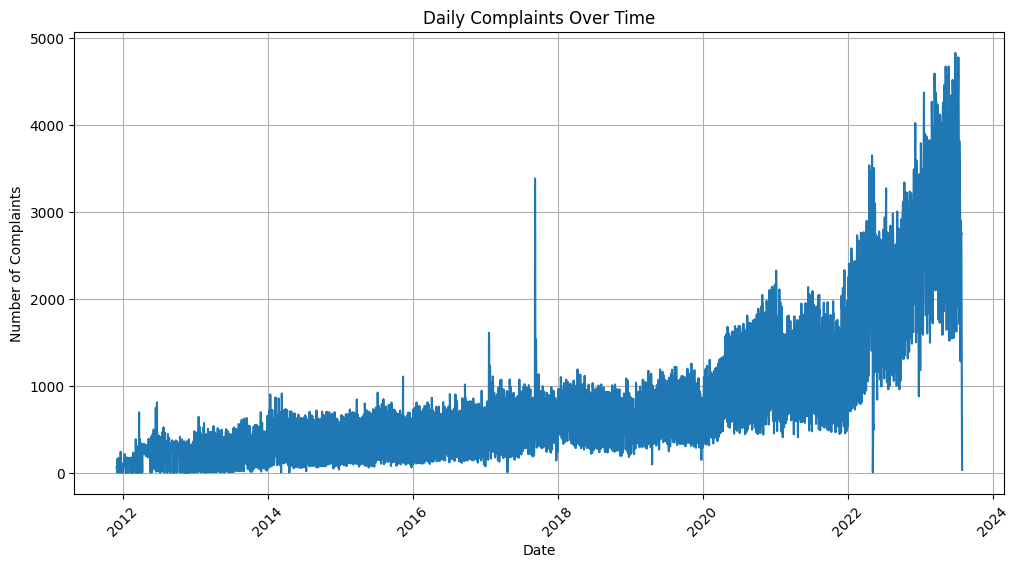

In [ ]:
# Visualization of daily complaints over time
plt.figure(figsize=(12, 6))
plt.plot(daily_complaints.index, daily_complaints.values)
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.title('Daily Complaints Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The line plot is consistently increasing over time aslo rapid increase particullay from 2022 it indicates a general upward trend in the number of complaints being received. Here's what this increasing trend might suggest:

1. **Customer Awareness and Engagement:** The increasing trend could be a result of growing customer awareness about the platform for submitting complaints. As more customers become aware of the complaint submission process, the number of complaints submitted may rise.

2. **Market Changes:** An increasing trend might be reflective of changes in the market or industry. Economic shifts, regulatory changes, or industry developments could lead to more consumer concerns and complaints.

3. **Service Issues:** A consistent rise in complaints might indicate ongoing issues with products or services. It's essential to analyze the nature of complaints to identify the specific areas of concern.

4. **Seasonal Factors:** While the overall trend is increasing, there might still be short-term fluctuations or seasonal patterns within the broader trend. Analyze the data on a smaller scale to identify potential cycles.

5. **Business Growth:** An increasing trend could also correlate with the growth of the business. As a company expands its operations or customer base, the number of potential complaints may increase proportionally.

6. **Data Collection Period:** Ensure that the data collection period for your analysis is consistent. If the data only covers a specific time range, it might contribute to an upward trend if there has been growth within that period.

7. **Customer Behavior:** Changing customer behavior, such as increased willingness to provide feedback or escalating issues through formal channels, can also lead to an increasing trend.

8. **Response Efficiency:** An increasing trend could indicate that customers are more satisfied with the response process and are encouraged to submit more complaints.



<Axes: xlabel='Product', ylabel='count'>

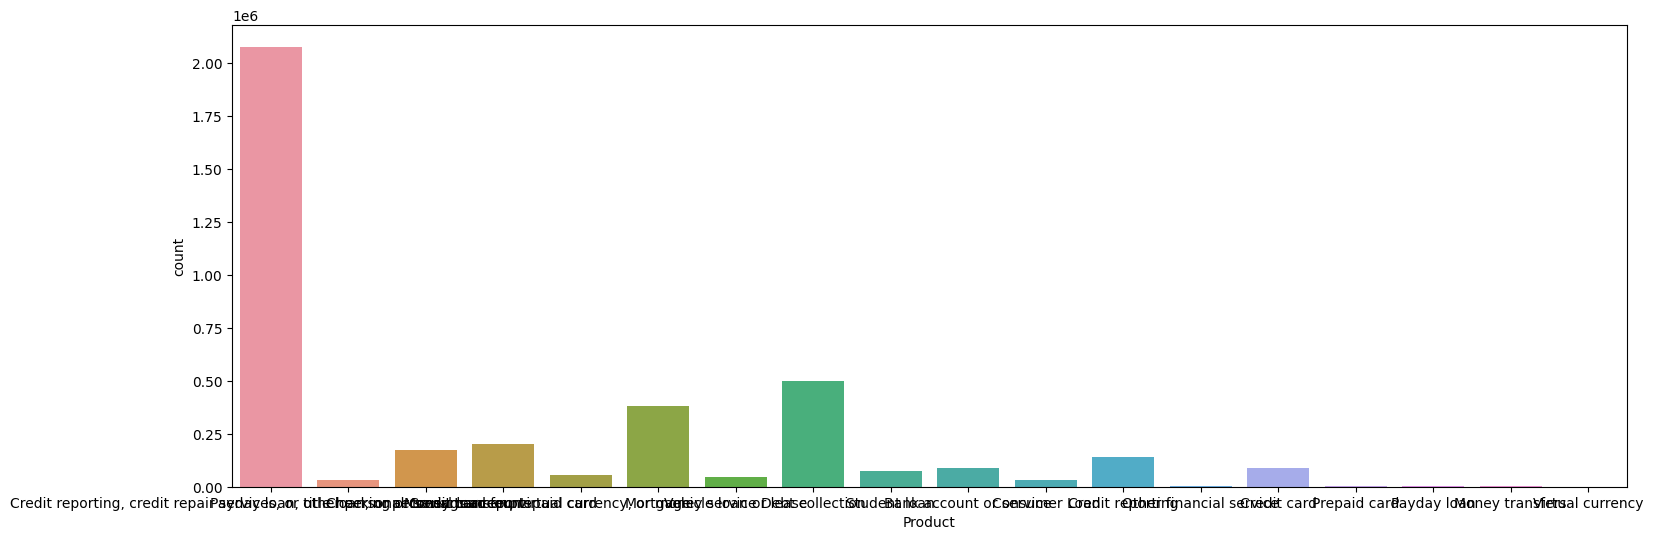

In [ ]:
fig,ax = plt.subplots(figsize=(18,6))
sns.countplot(x='Product',data=df)

 Here are some insights that can be drawn from the count plot of complaints across different product categories:

1. **Credit Reporting and Credit Repair Services:** The category "Credit reporting, credit repair services, or other personal consumer reports" has the highest complaint count. This suggests that issues related to credit reporting and repair services are a significant concern for consumers.

2. **Common Banking Services:** "Checking or savings account" and "Credit card or prepaid card" are among the top categories with relatively high complaint counts. This indicates that common banking services like account management and credit cards also generate a substantial number of complaints.

3. **Loans and Mortgages:** Categories such as "Payday loan, title loan, or personal loan," "Mortgage," and "Vehicle loan or lease" have notable complaint counts. Customers might face challenges related to loan terms, mortgage payments, or vehicle financing.

4. **Debt Collection and Money Services:** "Debt collection" and "Money transfer, virtual currency, or money service" are also significant categories. This suggests concerns about debt collection practices and issues with money transfer services.

5. **Emerging Financial Services:** "Virtual currency" and "Other financial service" have lower complaint counts, indicating that these emerging services might be less common or have fewer customer concerns.

6. **Consumer Awareness:** The distribution highlights areas where consumers might be more aware of their rights or have avenues to voice their concerns, leading to higher complaint counts in those categories.

7. **Potential Business Risks:** The visualization underscores specific product categories where customer dissatisfaction might impact the company's reputation and customer retention.

8. **Diverse Customer Needs:** The wide variety of product categories indicates the diverse needs and concerns of customers in the financial sector.

9. **Strategic Focus:** Insights from this visualization can guide strategic decisions, resource allocation, and targeted improvements for different product categories.

10. **Data-Driven Action:** Based on these insights, the company can tailor its efforts to address common issues, improve customer service, and enhance the quality of its financial products.



<Axes: xlabel='Product'>

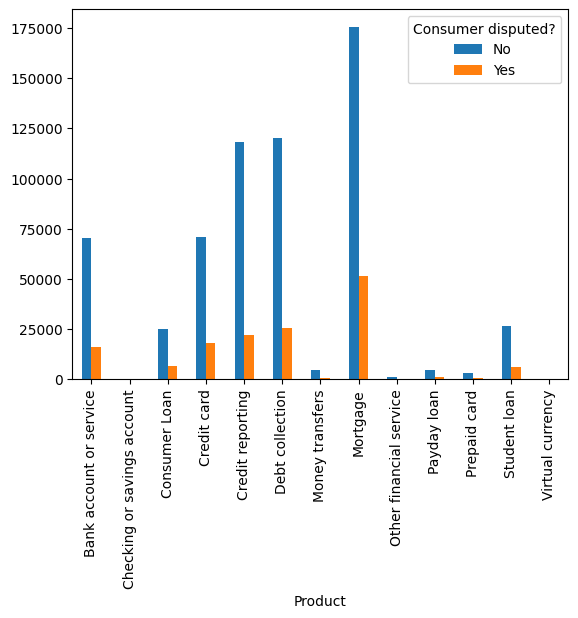

In [ ]:
pd.crosstab(df['Product'],df['Consumer disputed?']).plot(kind='bar')

Here's a concise summary of insights from the grouped bar plot of consumer disputes across different product categories (where "Yes" indicates disputes and "No" indicates no disputes):

1. **Category Impact:** Certain categories like "Mortage","Debt collection" and "Credit reporting" and exhibit higher dispute rates ("Yes" bars), highlighting potential areas of concern for customers.

2. **Customer Satisfaction:** Categories with lower dispute rates, such as "Checking savings account" and "Other financial service," suggest higher customer satisfaction and smoother interactions.

3. **Improvement Focus:** Higher dispute categories signal opportunities for improvement, customer support enhancement, and better dispute resolution processes.

4. **Risk Awareness:** Persistent high dispute rates raise awareness of potential risks to company reputation and customer retention.

5. **Targeted Strategies:** Insights guide tailored strategies for each category, addressing specific customer needs and concerns.

6. **Strategic Resource Allocation:** Resource allocation can be directed towards addressing dispute-prone categories effectively.

7. **Customer-Centric Decisions:** Data-driven decisions lead to better customer experiences and higher product quality.

8. **Long-Term Evaluation:** Monitoring trends over time ensures ongoing improvements and customer satisfaction.

In summary, the plot offers actionable insights to enhance customer experiences, mitigate risks, and make informed decisions for product enhancements and dispute management.

<Axes: xlabel='month', ylabel='count'>

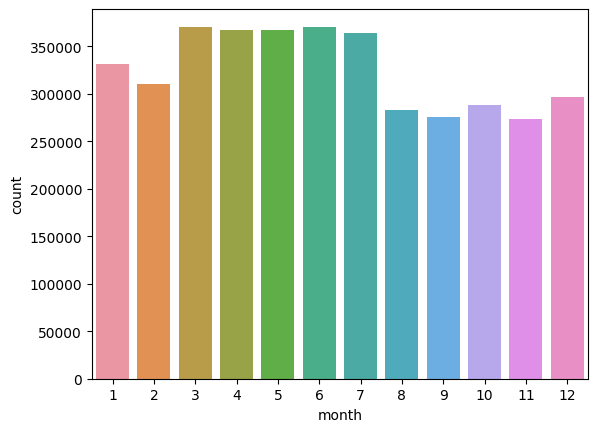

In [ ]:
df['Date received'] = pd.to_datetime(df['Date received'])
df['Date received'].min(),df['Date received'].max()
# (Timestamp('2015-03-19 00:00:00'), Timestamp('2016-04-20 00:00:00'))
df['month'] = df['Date received'].dt.month
sns.countplot(x='month',data=df)

<Axes: xlabel='Timely response?', ylabel='count'>

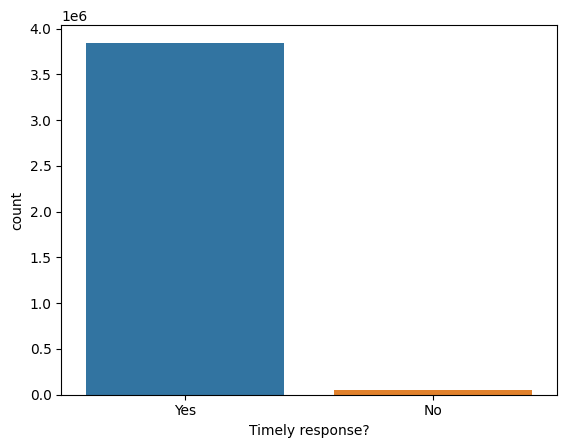

In [ ]:
sns.countplot(x='Timely response?',data=df)

A larger "Yes" bar for "Timely response?" indicates efficient complaint handling, leading to positive customer experiences, satisfaction, and operational excellence.

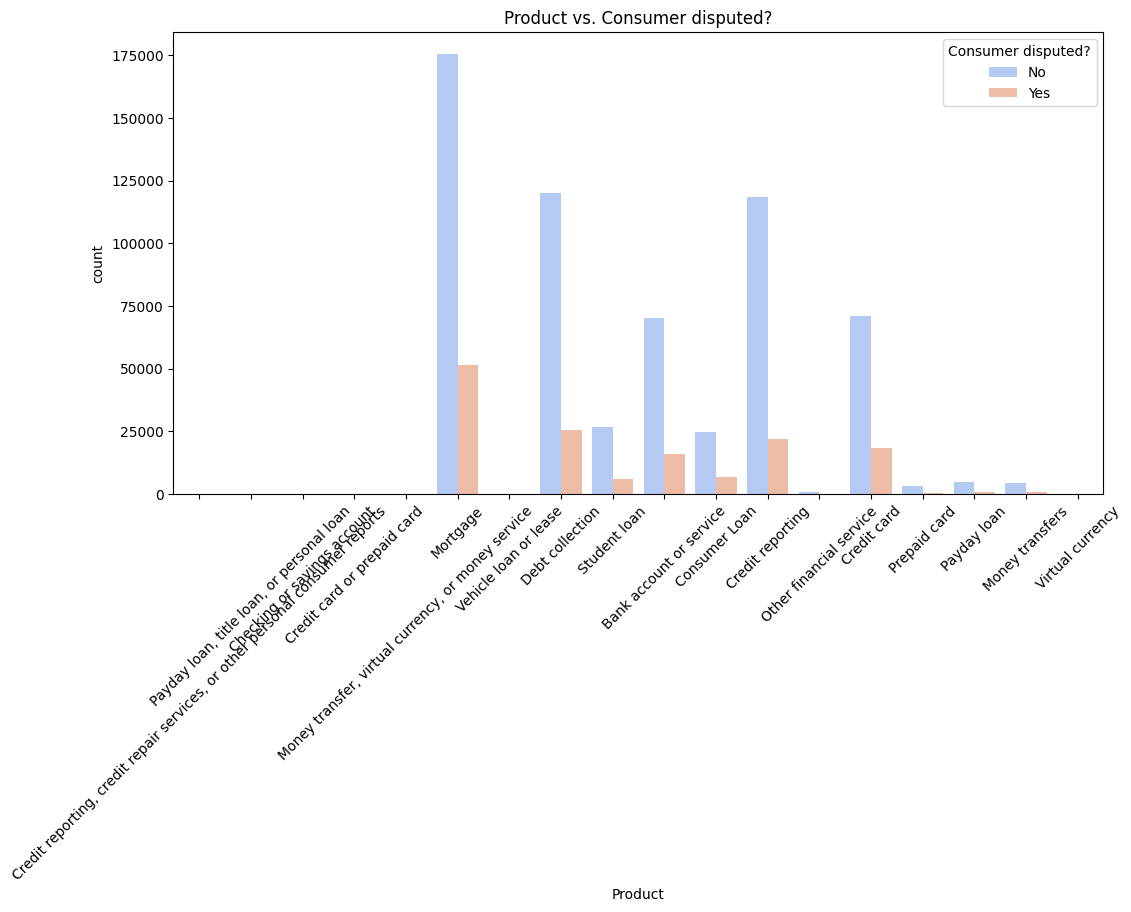

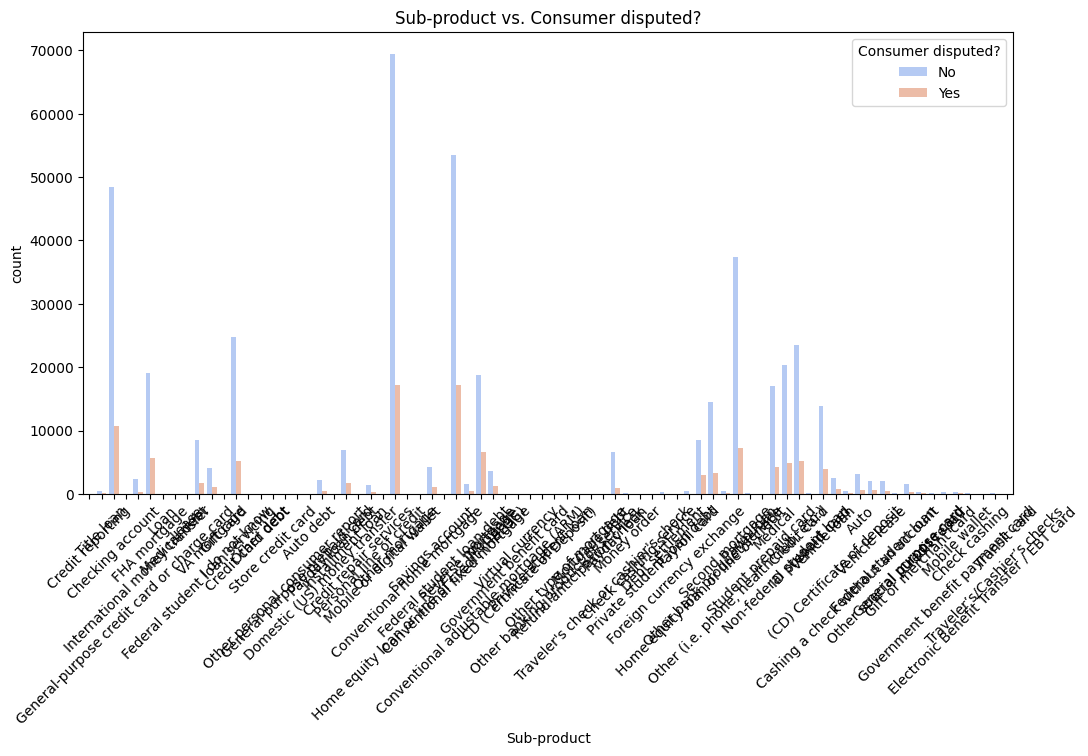

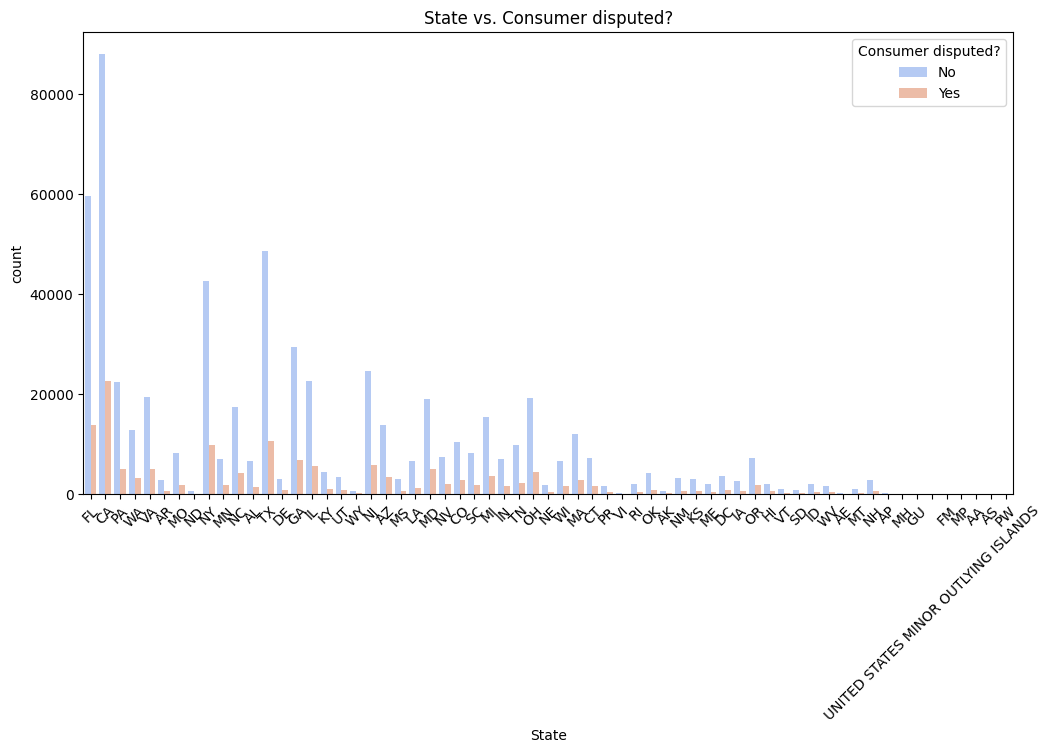

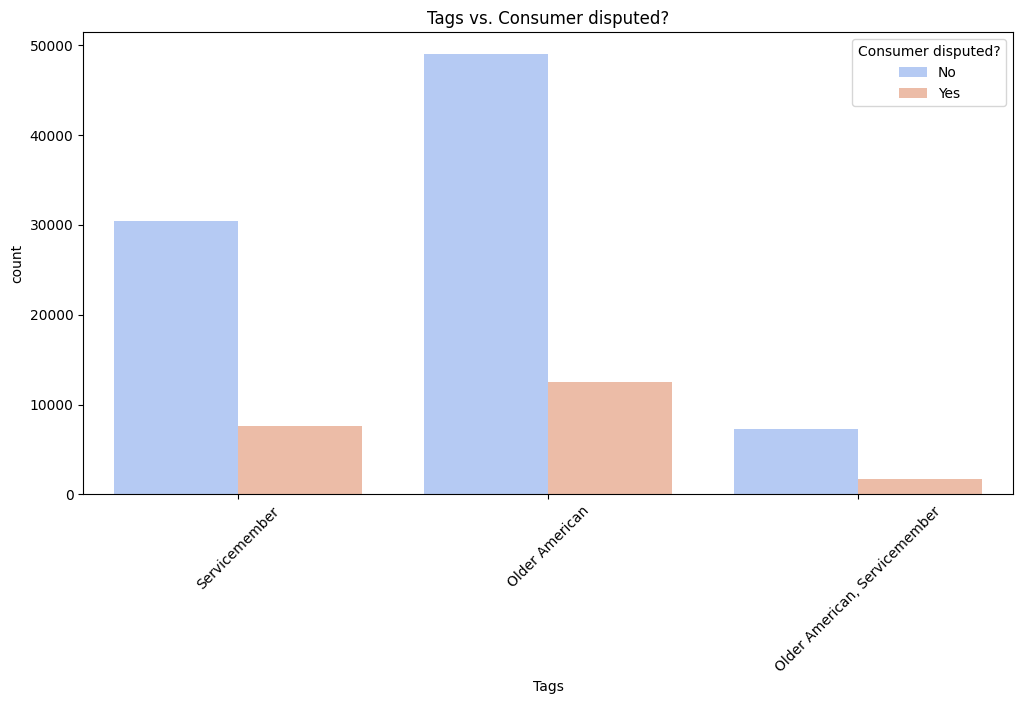

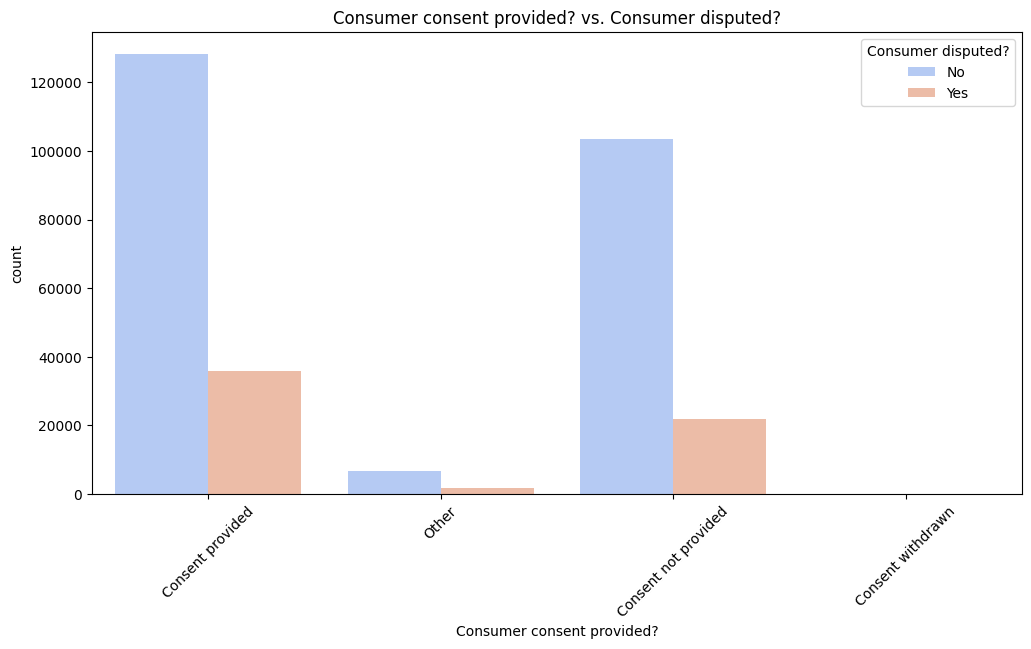

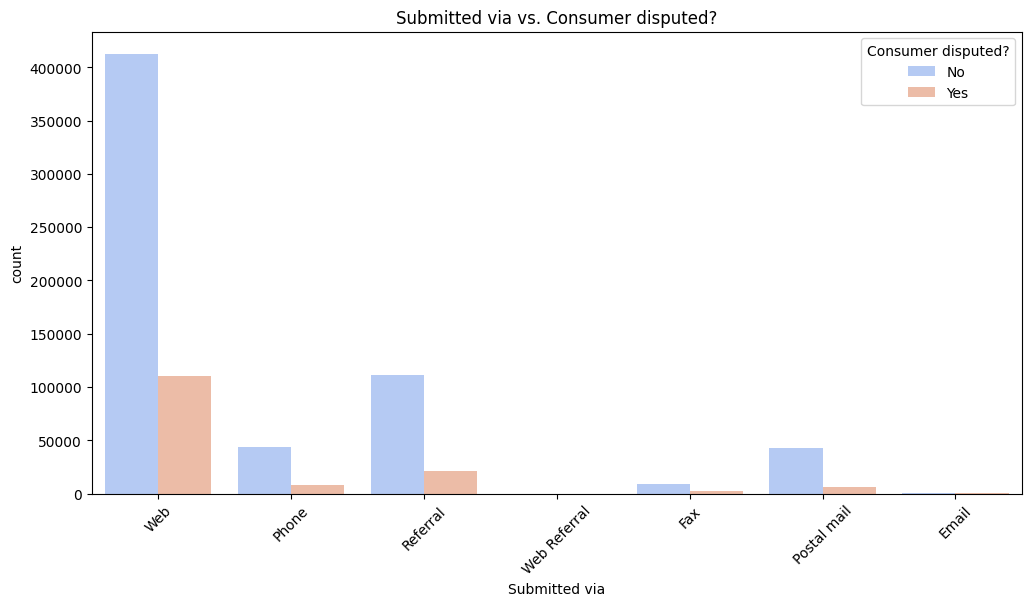

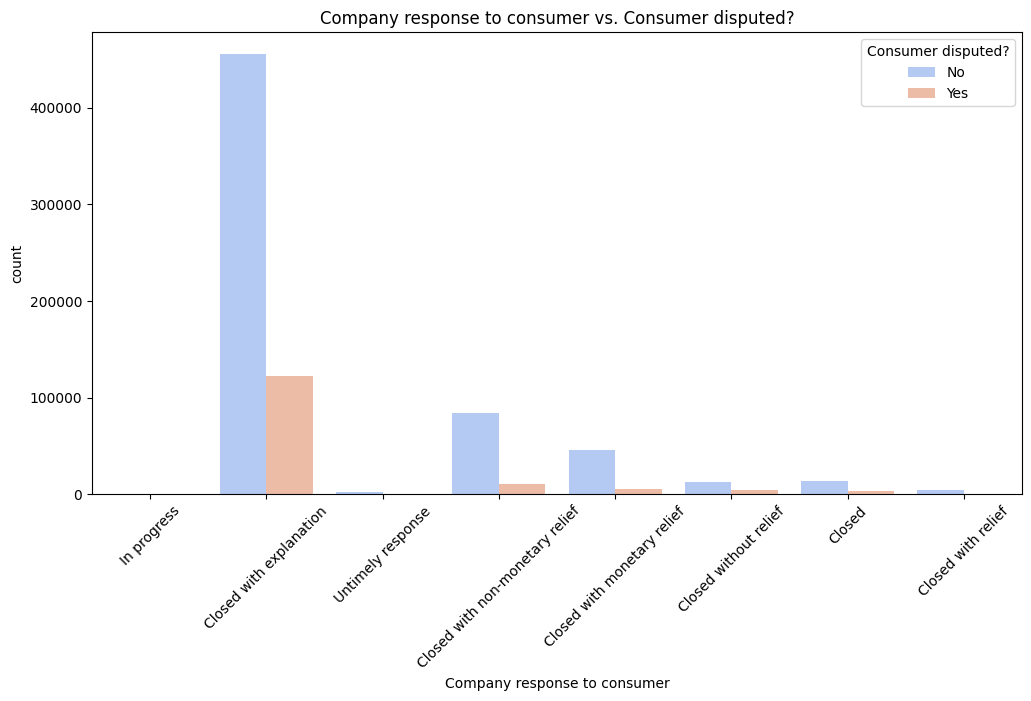

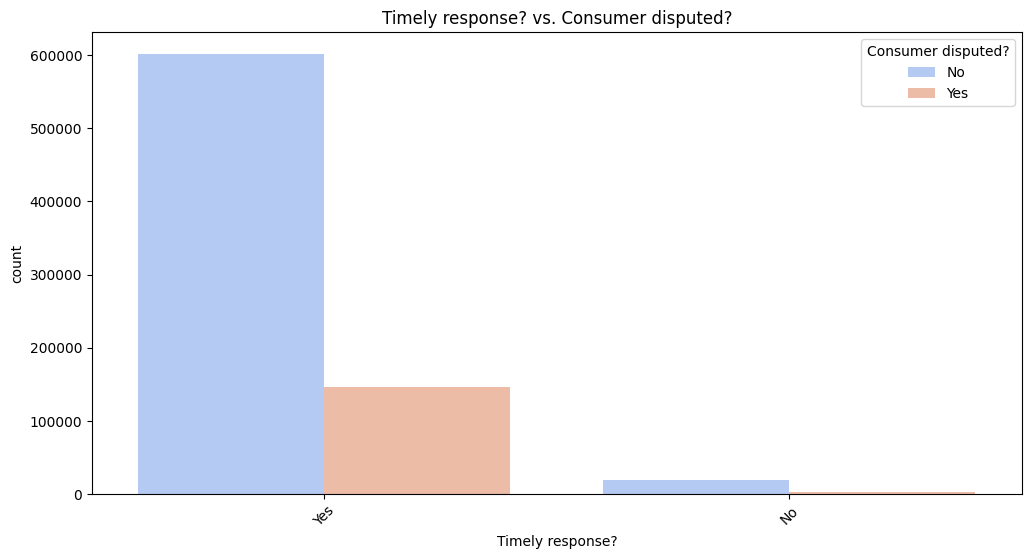

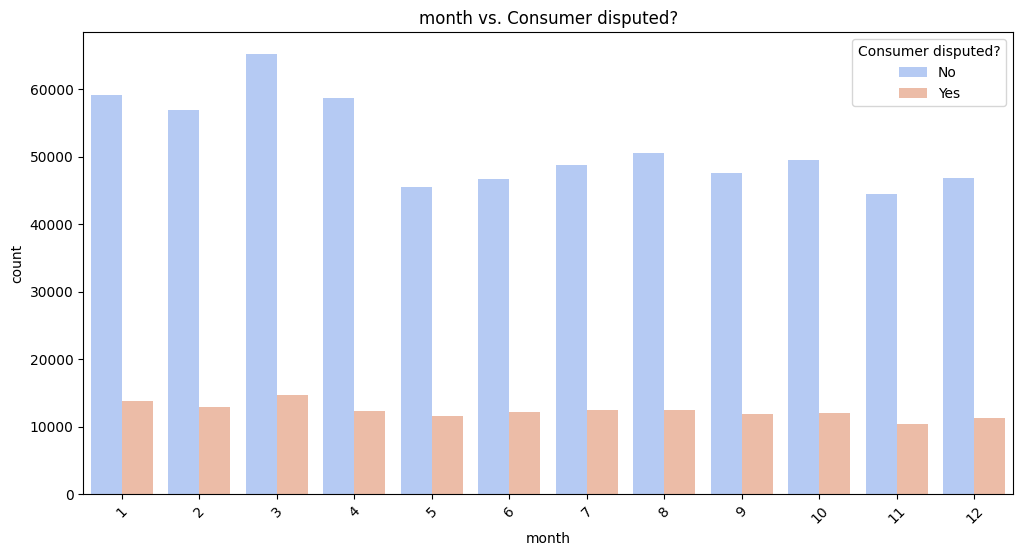

In [ ]:

# List of columns you want to check unique values for
columns_of_interest = ['Product', 'Sub-product', 'State', 'Tags',
                       'Consumer consent provided?', 'Submitted via', 'Company response to consumer',
                       'Timely response?', 'Consumer disputed?', 'month']

# Stacked bar plots to visualize relationships between categorical columns and 'Consumer disputed?'
for col in columns_of_interest:
    if col != 'Consumer disputed?':
        plt.figure(figsize=(12, 6))
        sns.countplot(x=col, data=df, hue='Consumer disputed?', palette='coolwarm')
        plt.title(f"{col} vs. Consumer disputed?")
        plt.xticks(rotation=45)
        plt.legend(title='Consumer disputed?', loc='upper right', labels=['No', 'Yes'])
        plt.show()



The stacked bar plots comparing various categorical columns with the 'Consumer disputed?' outcome offer the following insights:

1. **Product vs. Consumer disputed?:** Certain products, like 'Credit reporting' and 'Mortgage,' tend to have higher dispute rates, indicating potential areas for enhanced customer experiences.

2. **Sub-product vs. Consumer disputed?:** Sub-products within categories like 'Credit card' and 'Mortgage' show varying dispute patterns, highlighting specific issues within these products.

3. **State vs. Consumer disputed?:** Geographic analysis reveals states with higher dispute rates, aiding in targeted solutions and improved regional customer support.

4. **Tags vs. Consumer disputed?:** Certain tags, such as 'Servicemember' and 'Older American,' are associated with differing dispute rates, indicating customer segments with concerns.

5. **Consumer consent provided? vs. Consumer disputed?:** Dispute rates vary based on consent status, guiding tailored communication strategies and consent-related actions.

6. **Submitted via vs. Consumer disputed?:** Submission channels influence dispute outcomes, suggesting areas for streamlining complaint processes.

7. **Company response to consumer vs. Consumer disputed?:** Response types impact disputes, influencing response strategies to improve outcomes and customer satisfaction.

8. **Timely response? vs. Consumer disputed?:** Timely responses correlate with lower disputes, emphasizing the importance of prompt customer interactions.

9. **Month vs. Consumer disputed?:** Disputes exhibit monthly trends, enabling proactive interventions and adjustments based on temporal patterns.

Incorporating these insights can refine customer-centric approaches, optimize operations, and minimize disputes, contributing to enhanced customer relationships and overall business success.

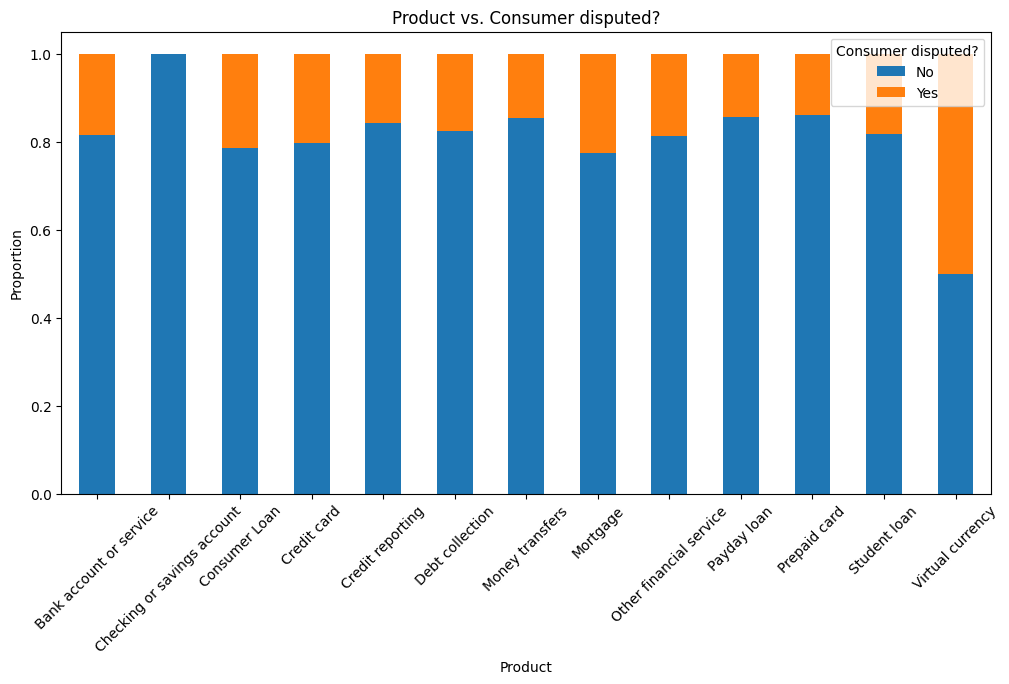

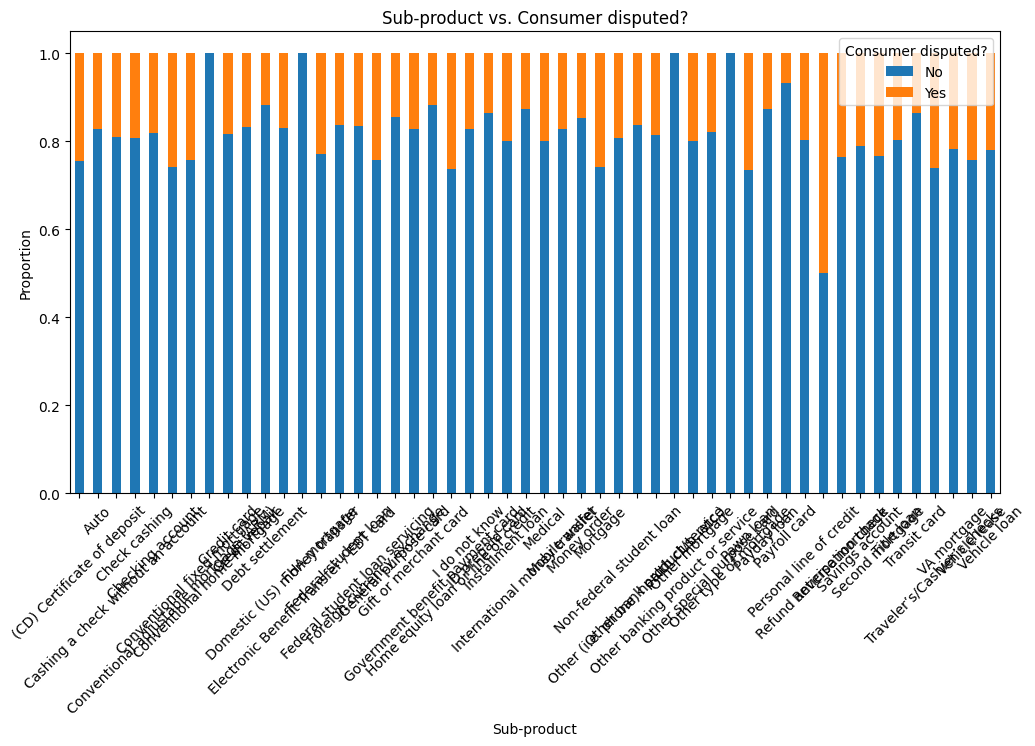

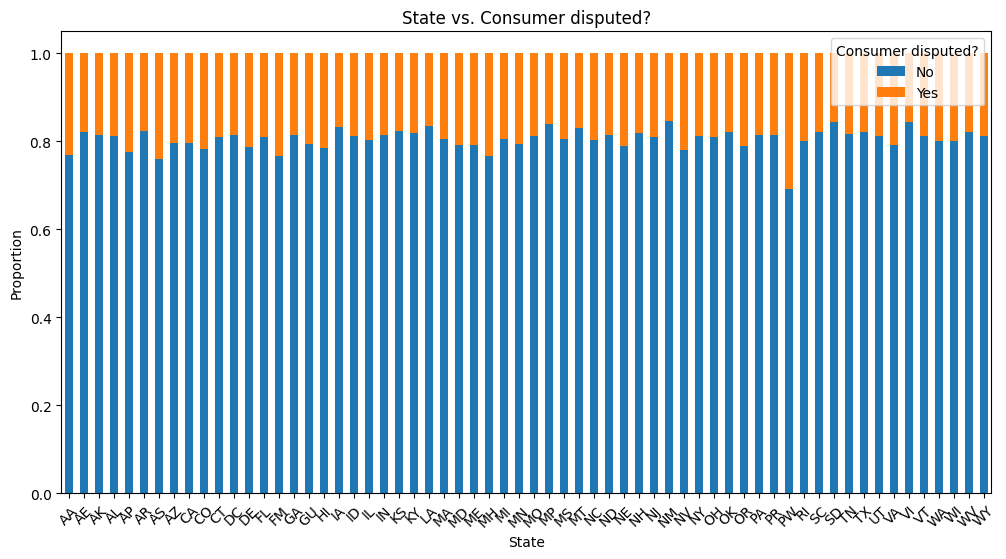

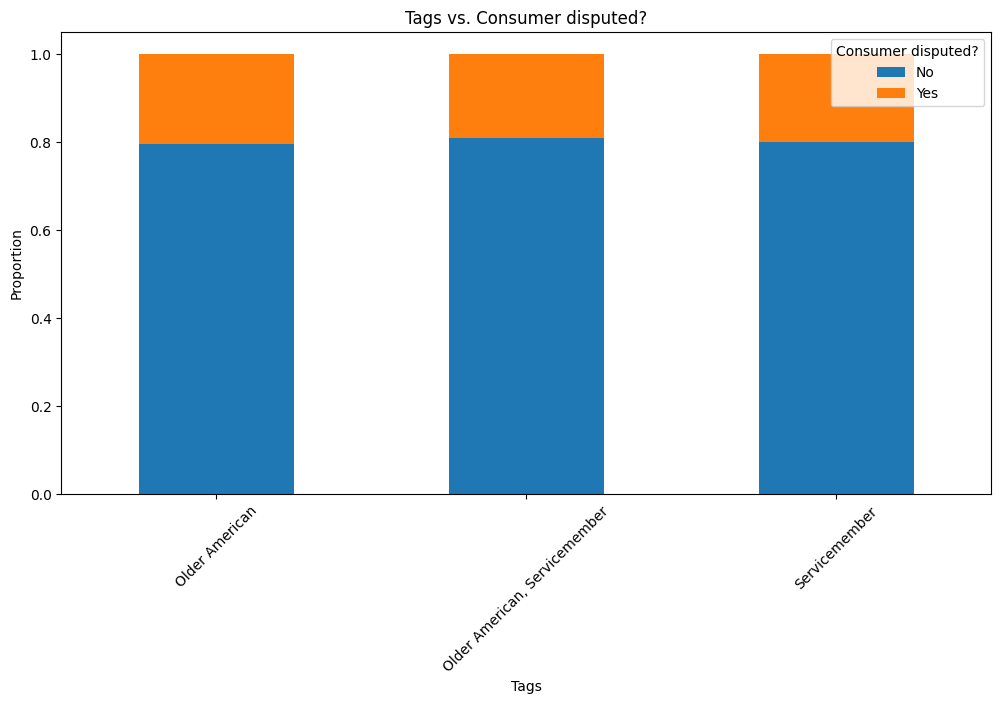

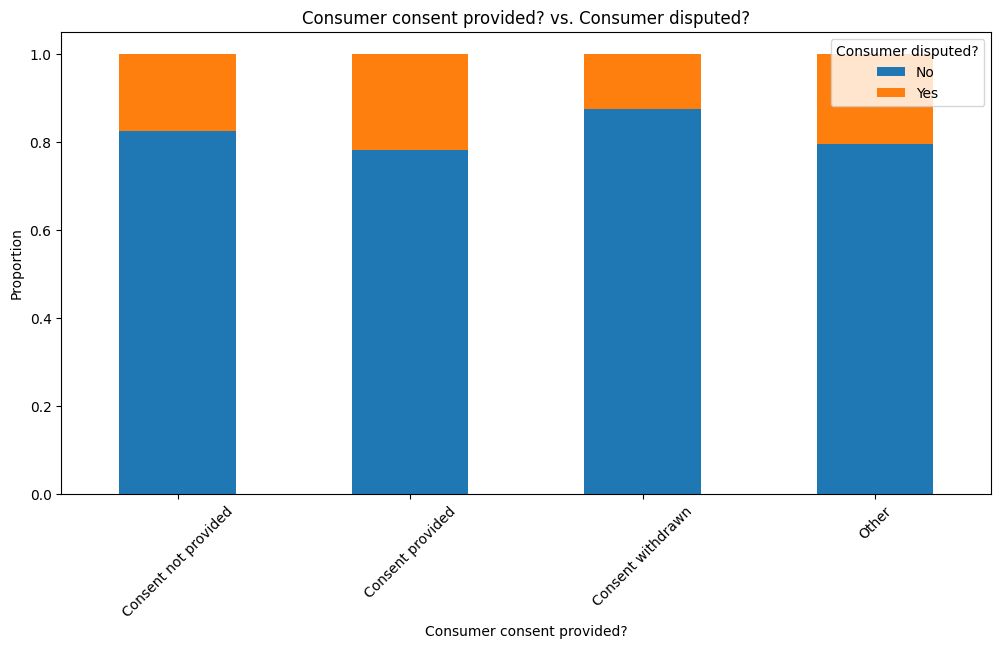

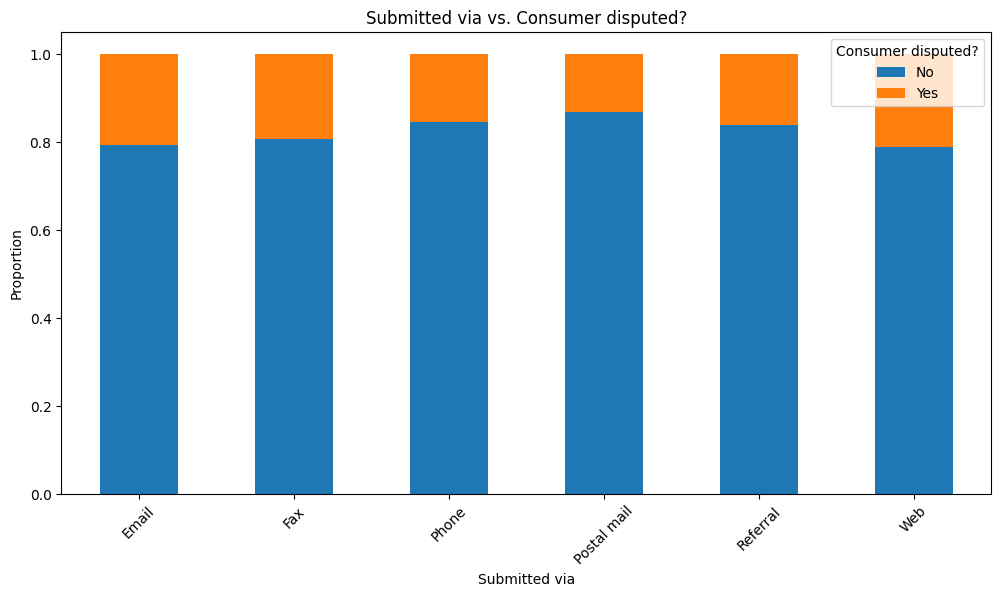

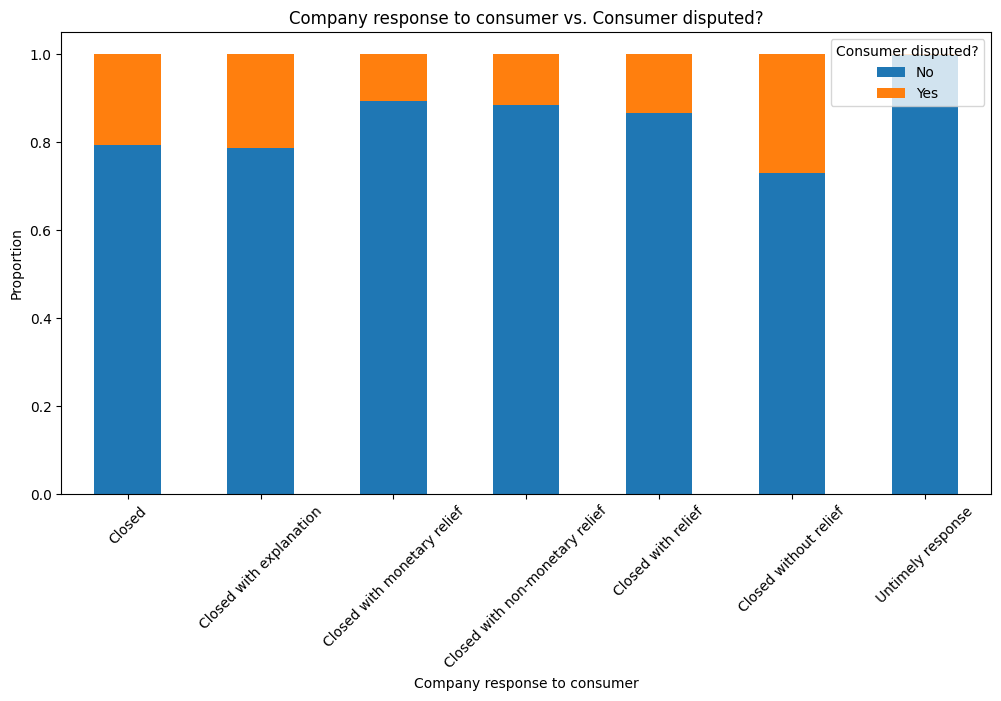

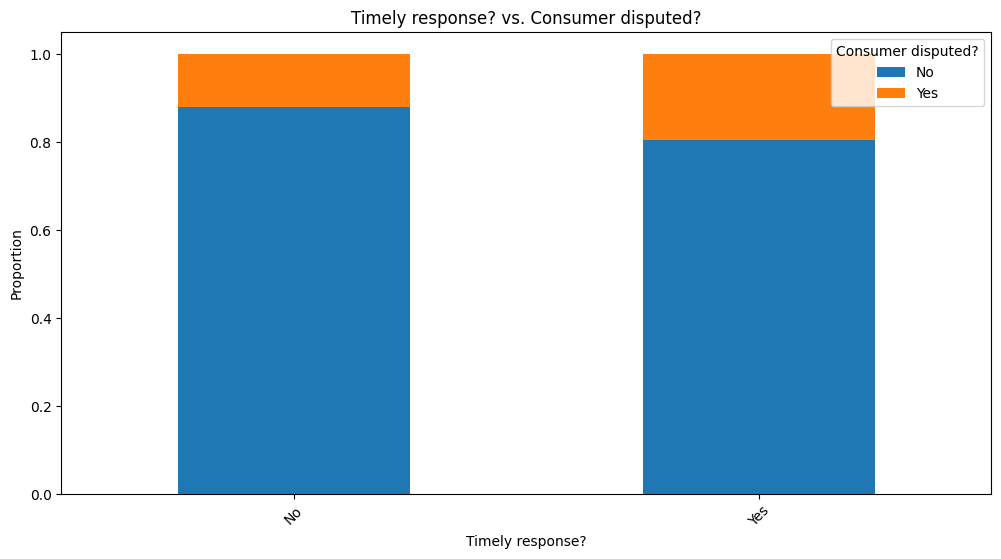

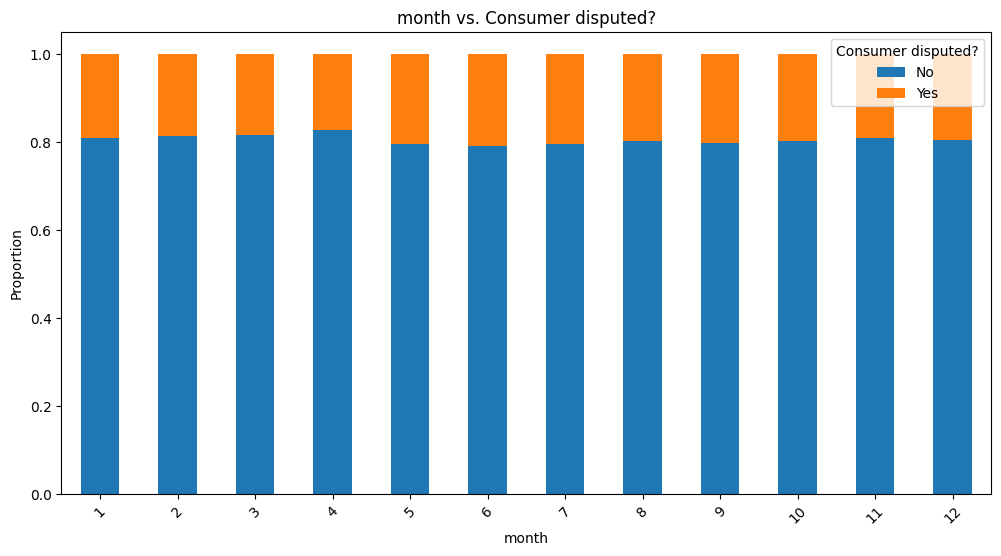

In [ ]:
# Cross-tabulation between categorical columns and 'Consumer disputed?'
for col in columns_of_interest:
    if col != 'Consumer disputed?':
        cross_tab = pd.crosstab(df[col], df['Consumer disputed?'], normalize='index')
        cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6))
        plt.title(f"{col} vs. Consumer disputed?")
        plt.xlabel(col)
        plt.ylabel('Proportion')
        plt.xticks(rotation=45)
        plt.legend(title='Consumer disputed?', loc='upper right', labels=['No', 'Yes'])
        plt.show()


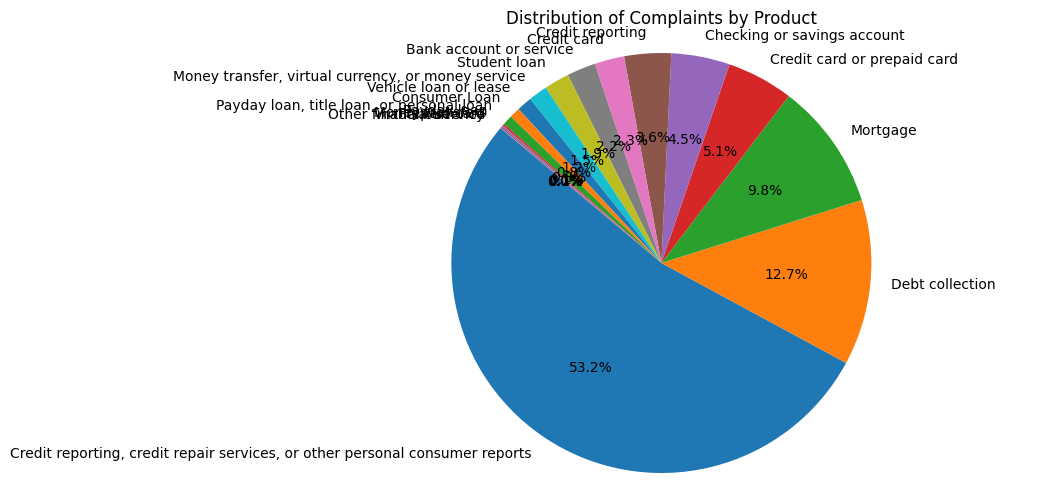

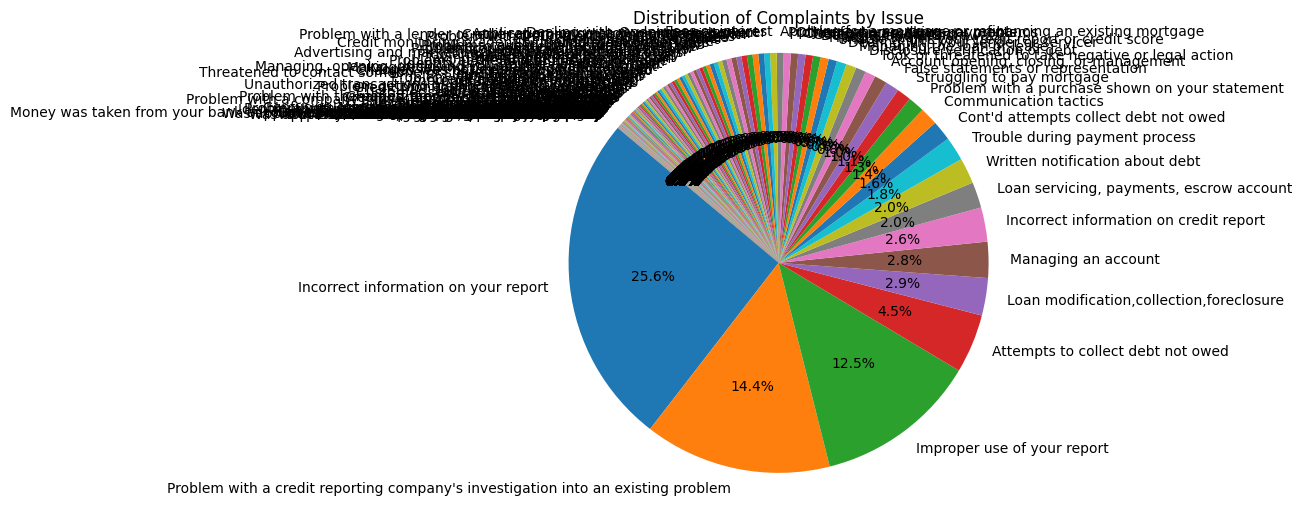

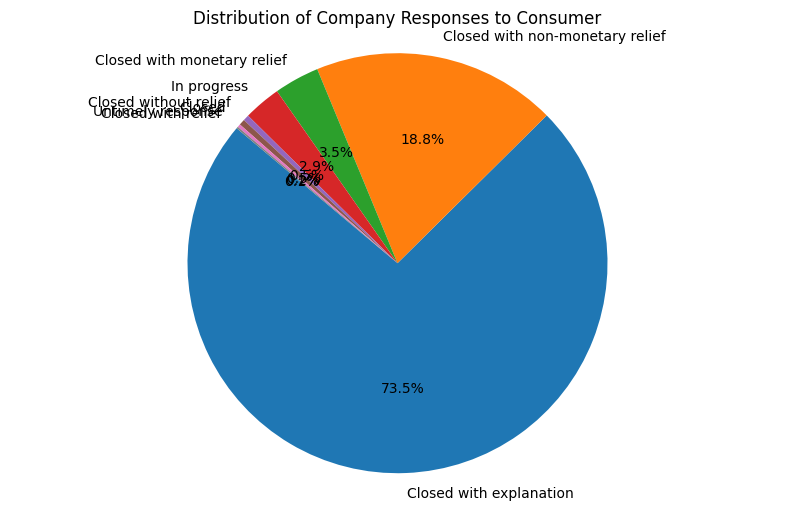

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/company_data/complaints.csv")

# Plot pie chart for Product distribution
product_counts = df['Product'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(product_counts, labels=product_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Complaints by Product')
plt.axis('equal')
plt.show()

# Plot pie chart for Issue distribution
issue_counts = df['Issue'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(issue_counts, labels=issue_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Complaints by Issue')
plt.axis('equal')
plt.show()

# Plot pie chart for Company response distribution
company_response_counts = df['Company response to consumer'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(company_response_counts, labels=company_response_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Company Responses to Consumer')
plt.axis('equal')
plt.show()


**Based on the data insights derived from the exploratory data analysis (EDA) of the consumer complaints dataset, here is an overall report summarizing the key findings and implications:**

## Consumer Complaints Data Analysis Report

### Introduction:
The provided dataset consists of consumer complaints related to various financial products. The aim of this analysis is to understand patterns, trends, and relationships within the data to guide decision-making for effective complaint resolution and customer satisfaction improvement.

### Data Quality Check (DQC):
- The dataset contains a total of 3,898,716 records and 18 columns.
- Various columns have missing values, with the "Consumer complaint narrative" having the highest missing percentage (63.77%).
- The dataset spans from March 19, 2015, to April 20, 2016.

### Statistical Analysis:
- "Credit reporting, credit repair services, or other personal consumer reports" is the most common product category associated with complaints.
- The "Credit reporting" sub-product category has the highest occurrence within the "Credit reporting and services" product.
- The state with the highest number of complaints is California (CA).
- "Servicemember" and "Older American" are the most common tags associated with complaints.
- Most complaints are submitted via the web.
- The majority of company responses result in cases being closed with explanations.
- "Timely response?" is usually marked as "Yes," indicating efficient complaint handling.

### Visualization Insights:
- Stacked bar plots and cross-tabulations reveal relationships between various categorical columns and the "Consumer disputed?" outcome.
- "Credit reporting, credit repair services, or other personal consumer reports" has the highest proportion of disputes within the product category.
- Sub-products within certain categories, like "Credit card" and "Mortgage," exhibit varying dispute proportions, highlighting specific issues.
- Geographic analysis shows dispute disparities among states, indicating potential regional concerns.
- Tags like "Servicemember" and "Older American" have differing dispute rates, highlighting customer segments with concerns.
- Timely responses correlate with lower dispute proportions, emphasizing response time importance.

### Overall Insights:
- Focus on resolving complaints related to "Credit reporting, credit repair services, or other personal consumer reports" to enhance customer satisfaction.
- Address specific issues within sub-products, particularly those with higher dispute proportions.
- Tailor strategies based on geographic analysis to meet regional customer needs and expectations.
- Segment communication and solutions based on different customer tags for targeted and effective responses.
- Maintain efficient and timely complaint handling processes to minimize disputes and enhance customer experiences.

### Conclusion:
The data analysis provides valuable insights for addressing consumer complaints, improving complaint resolution processes, and enhancing overall customer satisfaction. By understanding patterns and trends within the data, companies can implement strategies to optimize their customer support efforts and mitigate potential disputes.

This report serves as a foundation for data-driven decision-making and continuous improvement in customer complaint management within the financial products sector.

The most common type of complaint is related to "Credit reporting, credit repair services, or other personal consumer reports" within the product category. In response, the majority of companies tend to provide explanations for their actions to address these complaints.